In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


df_preproceesed = pd.read_csv('data/df/df_artists_song_preprocessed.csv')
df_preproceesed.head()

,artist,lyrics,song_strings_lists,song_spacy
0,bastille_,"Ooh, I'm not ready\nOoh, I'm not ready\nOoh, I...","['ooh', 'ready', 'ooh', 'ready', 'ooh', 'ready...","ooh, ready, ooh, ready, ooh, ready, ooh, ready..."
1,rolling_blackouts_coastal_fever,Stepping into the town\nIgnore the stink of bu...,"['step', 'town', 'ignore', 'stink', 'burn', 'l...","step, town, ignore, stink, burn, leather, youn..."
2,rolling_blackouts_coastal_fever,"Stand on the morning, head like a weather vane...","['stand', 'morning', 'head', 'like', 'weather'...","stand, morning, head, like, weather, vane, sti..."
3,bastille_,"Yeah, would I lie to you baby?\nYeah, would I?...","['yeah', 'lie', 'baby', 'yeah', 'yeah', 'lie',...","yeah, lie, baby, yeah, yeah, lie, baby, yeah, ..."
4,rolling_blackouts_coastal_fever,I see a problem\nI'm not willing to address\nA...,"['problem', 'willing', 'address', 'pleasure', ...","problem, willing, address, pleasure, want, imp..."


### Train-test splitting

In [3]:
X = df_preproceesed['song_spacy']
y = df_preproceesed['artist']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # stratify=y

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((88,), (23,), (88,), (23,))

### transform lyrics into BOW document vectors
### fit a count vectorizer and apply  the Tf-Idf Transformer using  the TfidfVectorizer
This does both steps (count vectorizer and tfidfTransfomer) in one


*TF-IDF's - are numbers between 0 and 1*

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
cv = TfidfVectorizer(stop_words='english')


In [7]:
corpus = cv.fit(X_train)
new_corpus_x_train = cv.fit(X_train).transform(X_train)
new_corpus_x_test = cv.fit(X_train).transform(X_test)

In [8]:
cv.vocabulary_

{'awaken': 62,
 'satin': 997,
 'sheet': 1046,
 'velvet': 1270,
 'morning': 758,
 'gaze': 505,
 'stinking': 1141,
 'street': 1153,
 'black': 107,
 'glass': 509,
 'reflect': 935,
 'warning': 1292,
 'lose': 701,
 'team': 1193,
 'place': 857,
 'fat': 427,
 'land': 648,
 'right': 967,
 'face': 413,
 'sight': 1065,
 'tongue': 1227,
 'like': 672,
 'shine': 1049,
 'sword': 1181,
 'suit': 1161,
 'armour': 48,
 'powder': 881,
 'blue': 115,
 'run': 987,
 'wild': 1317,
 'boy': 127,
 'good': 517,
 'different': 330,
 'long': 695,
 'lunch': 709,
 'slowly': 1093,
 'massage': 722,
 'neck': 770,
 'cloud': 223,
 'descend': 315,
 'watch': 1295,
 'news': 777,
 'let': 660,
 'feeling': 438,
 'die': 328,
 'phone': 845,
 'ring': 968,
 'ticket': 1214,
 'look': 697,
 'past': 831,
 'stone': 1144,
 'gate': 504,
 'corridor': 253,
 'wind': 1321,
 'carpet': 170,
 'drape': 359,
 'candlelight': 159,
 'oil': 794,
 'portrait': 877,
 'hang': 548,
 'enter': 394,
 'mahogany': 713,
 'room': 981,
 'rope': 982,
 'lie': 666,
 '

In [9]:
new_corpus_x_train, new_corpus_x_test

(<88x1358 sparse matrix of type '<class 'numpy.float64'>'
 	with 3768 stored elements in Compressed Sparse Row format>,
 <23x1358 sparse matrix of type '<class 'numpy.float64'>'
 	with 852 stored elements in Compressed Sparse Row format>)

In [10]:
df_train = pd.DataFrame(new_corpus_x_train.todense(), columns=cv.get_feature_names()) 
df_test = pd.DataFrame(new_corpus_x_test.todense(), columns=cv.get_feature_names()) # , index=['coldplay', 'masego']

df_train.head()

,accident,ache,achilles,act,action,add,addicted,address,admit,adore,...,yard,yeah,year,yearn,yellow,yes,yonder,young,youth,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.364463,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.072798,0.024843,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# join y train and y test respectively 
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [12]:
df_train['y_train'] = y_train
df_test['y_test'] = y_test

In [13]:
df_test.head()

,accident,ache,achilles,act,action,add,addicted,address,admit,adore,...,yeah,year,yearn,yellow,yes,yonder,young,youth,zone,y_test
0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rolling_blackouts_coastal_fever
1,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rolling_blackouts_coastal_fever
2,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bastille_
3,0.0,0.2114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rolling_blackouts_coastal_fever
4,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rolling_blackouts_coastal_fever


In [14]:
df_train['y_train'].value_counts(normalize=True)

bastille_                          0.727273
rolling_blackouts_coastal_fever    0.272727
Name: y_train, dtype: float64

In [15]:
df_test['y_test'].value_counts(normalize=True)

bastille_                          0.608696
rolling_blackouts_coastal_fever    0.391304
Name: y_test, dtype: float64

In [16]:
# Create a function that prints scores and a confusion matrix for a specified model
def print_evaluations(ytrue, ypred, model):
    '''
    Prints the confusion matrix and some evaluation metrics for 
    a specified model.
    '''
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred, pos_label="bastille_" ), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred, pos_label="bastille_"), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred, pos_label="bastille_"), 3)}')
    
    # , pos_label='bastille_'
    # , labels= ['bastille_', 'rolling_blackouts_coastal_fever']
    
    #print confusion matrix
    fig = plt.figure(figsize=(12, 12))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='.0f', ax= ax)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['bastille', 'rolling blackouts'])
    ax.yaxis.set_ticklabels(['bastille', 'rolling blackouts'])

In [17]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.y_train

X_train.shape, y_train.shape

((88, 1358), (88,))

In [18]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.y_test

X_test.shape, y_test.shape

((23, 1358), (23,))

In [19]:
y_test.values

array(['rolling_blackouts_coastal_fever',
       'rolling_blackouts_coastal_fever', 'bastille_',
       'rolling_blackouts_coastal_fever',
       'rolling_blackouts_coastal_fever', 'bastille_',
       'rolling_blackouts_coastal_fever', 'bastille_',
       'rolling_blackouts_coastal_fever', 'bastille_', 'bastille_',
       'bastille_', 'rolling_blackouts_coastal_fever', 'bastille_',
       'bastille_', 'bastille_', 'bastille_',
       'rolling_blackouts_coastal_fever',
       'rolling_blackouts_coastal_fever', 'bastille_', 'bastille_',
       'bastille_', 'bastille_'], dtype=object)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, confusion_matrix, f1_score


rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

In [21]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [22]:
# Make predictions on the test data
ypred_rf = rf.predict(X_test)
ypred_rf  # only class 1 

array(['bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_'], dtype=object)

In [23]:
# make predictions for an unknow word
#my_word = morning
#my_word = glass
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(stop_words='english')
new_row = corpus.transform(['formal'])

ypred_rf_single_word = rf.predict(new_row)
ypred_rf_single_word

array(['bastille_'], dtype=object)

In [24]:
type(y_test), y_test.shape, ypred_rf.shape

(pandas.core.series.Series, (23,), (23,))

In [25]:
# Inspect the evaluators
#print_evaluations(y_test.values, ypred_rf, 'RandomForest')

### Apply Undersampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [27]:
# Instantiate both resamplers
rus = RandomUnderSampler(sampling_strategy={'bastille_':50})
nm = NearMiss(sampling_strategy={'bastille_':50})

In [28]:
# Resample according to both resamplers
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_nm, y_nm = nm.fit_resample(X_train, y_train)

In [29]:
X_rus.shape, y_rus.shape

((74, 1358), (74,))

In [30]:
# Fit the random undersampling model, 
# make predictions and inspect evaluations
rf.fit(X_rus, y_rus)
ypred_rus = rf.predict(X_test)
#print_evaluations(y_test, ypred_rus, 'RandomUndersampling')

In [31]:
# Fit the Near Miss, 
# make predictions and inspect evaluations
rf.fit(X_nm, y_nm)
ypred_nm = rf.predict(X_test)
#print_evaluations(y_test, ypred_nm, 'NearMiss')

### Apply Oversampling

In [32]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [33]:
# RandomOverSampler Model
ros = RandomOverSampler(sampling_strategy={'rolling_blackouts_coastal_fever':64})

In [34]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [35]:
np.unique(y_ros, return_counts=True)

(array(['bastille_', 'rolling_blackouts_coastal_fever'], dtype=object),
 array([64, 64]))

How does model RandomOversampling score:
The accuracy of the model is: 0.696
The precision of the model is: 0.667
The recall of the model is: 1.0
The f1-score of the model is: 0.8
[[14  0]
 [ 7  2]]


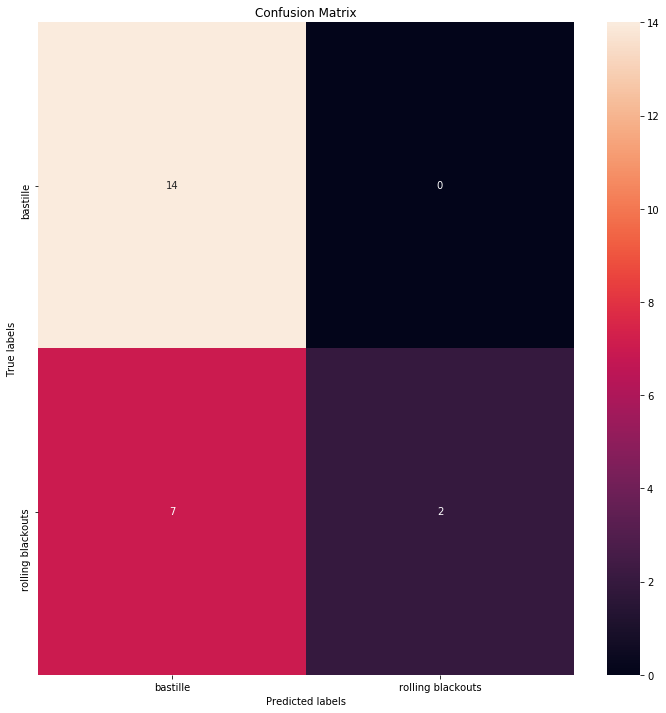

In [36]:
# Fit the RandomOverSampling, 
# make predictions and inspect evaluations
rf.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)
print_evaluations(y_test, ypred_ros, 'RandomOversampling')

In [37]:
ypred_ros

array(['rolling_blackouts_coastal_fever', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_',
       'rolling_blackouts_coastal_fever', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_', 'bastille_',
       'bastille_', 'bastille_', 'bastille_', 'bastille_'], dtype=object)

In [38]:
# make predictions for a single row of the count vectorizer matrix
single_ypred_rf = rf.predict(np.array((X_test.iloc[8,:])).reshape(1, -1))
single_ypred_rf

array(['bastille_'], dtype=object)

#### -> Oversampling improves my model!

### Use LogisticRegressionModel

In [39]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(C=0.2, random_state=42)
log_r.fit(X_train, y_train)
ypred_log_r = nb.predict(X_test)

NameError: name 'nb' is not defined

In [ ]:
#print_evaluations(y_test.values, ypred_log_r, 'Logistic Regression')

### Use the Naive Bayes MultinomialNB

`class sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)`

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

*Notes:*

*- Naive Bayes will produce bad results if the dataset contains outliers -> feature engineering becomes more important*

*- it can deal with class imbalance - no preprocessing needed*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.4) # smaller alphas = way better results - but maybe overfitted?
nb.fit(X_train, y_train)
ypred_nb = nb.predict(X_test)

In [ ]:
print_evaluations(y_test.values, ypred_nb, 'Naive Bayes MultinomialNB')

### try with Naive Bayes with random oversampled data:

In [ ]:
nb2 = MultinomialNB(alpha=1)
nb2.fit(X_ros, y_ros)
ypred_nb = nb.predict(X_test)
print_evaluations(y_test.values, ypred_nb, 'Naive Bayes MultinomialNB Random Oversampled')

## same results!

### Cross Validation